In [0]:
##line1:VGG19 model's fc1 layer (last before layer) of the architecture is extracted and visualized
#http://image-net.org/about-stats
#https://arxiv.org/abs/1512.03385
#below code has been tested and executed only in colab.research.google.com .Please make sure you have enabled GPU from notebook settings before execution

In [2]:
#for visualising VGG19 model
!pip install -q pydot-ng
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [0]:
import pydot_ng
import graphviz

In [4]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input,decode_predictions
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [0]:
#For visualising picture
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
#extracting 'fc1'(fully connected layer 1) layer from base_model and storing it in model
base_model=VGG19(weights='imagenet',include_top=True)
model=Model(inputs=base_model.input,outputs=base_model.get_layer('fc1').output)

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Activation


In [0]:
#its not possible to give predictions from fc1 layer immediately ;only after passing it through softmax layer (assigning probabilities) we can use predict function to classify 
#in order to add layer you need to take a sequential initialized model and then add fc1 model along with it 

In [0]:
#sequential model is initialised with model2
model2=Sequential()
#fc1 layer is added in a sequential manner to model2
model2.add(model)
#adding softmax layer for prediction
model2.add(Dense(1000,activation='softmax'))

In [0]:
#image is loaded from url
#you can use imread to load loacally 
from urllib.request import urlopen

In [0]:
#url of the image is stored in url_link1
url_link1=urlopen("https://secure.img1-fg.wfcdn.com/im/60243122/resize-h800%5Ecompr-r85/4037/40372281/Corona+Extendable+Dining+Table.jpg")

In [0]:
#(224,224) is the target size of resnet50 model
img=image.load_img(url_link1,target_size=(224,224))

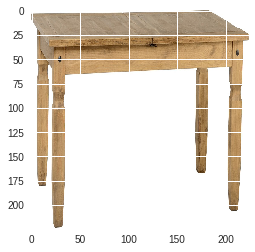

In [13]:
#visuvalising input image
plt.imshow(img)

In [0]:
#preprocessing input image
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [0]:
fc1_layer=model2.predict(x)

In [16]:
print("predict:",decode_predictions(fc1_layer))

predict: [[('n02481823', 'chimpanzee', 0.5984178), ('n02108915', 'French_bulldog', 0.06021018), ('n04344873', 'studio_couch', 0.053470187), ('n04311004', 'steel_arch_bridge', 0.04979494), ('n03485794', 'handkerchief', 0.041064322)]]


In [0]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

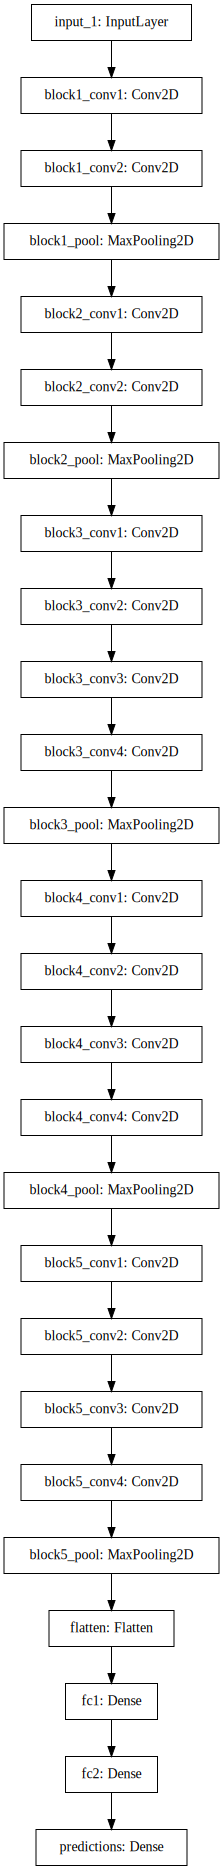

In [17]:
#model of base_model(complete VGG19)
SVG(model_to_dot(base_model).create(prog='dot',format='svg'))

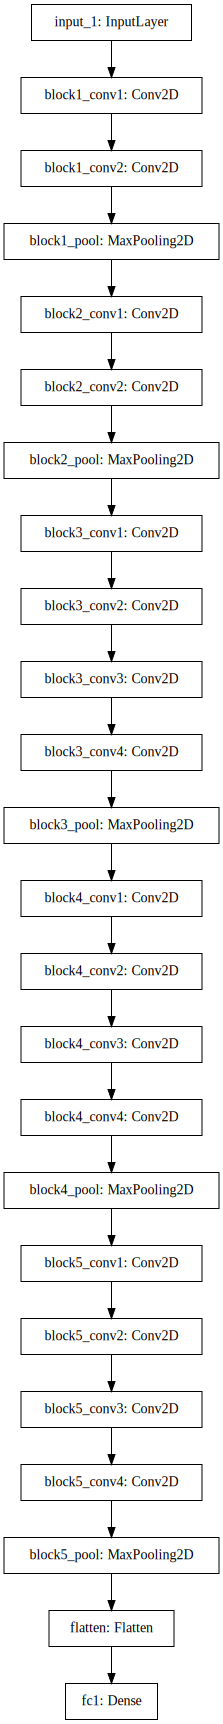

In [18]:
#below you can see that model contains blocks till 'fc1' layer (model)
#extracted model
SVG(model_to_dot(model).create(prog='dot',format='svg'))

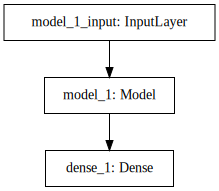

In [19]:
#after addition of dense1 layer for softmax prediction(model+softmax) 
#(extracted layer+ softmax)--->predictions
SVG(model_to_dot(model2).create(prog='dot',format='svg'))

In [21]:
#you can use model.summary() function to visualize models in text wise manner along with parameters
#model.summary()
#base_model.summary() 
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 4096)              122788928 
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              4097000   
Total params: 126,885,928
Trainable params: 126,885,928
Non-trainable params: 0
_________________________________________________________________
